# BiomeFUN 
# Ecological Models

This notebook contains the exercises covered in the lecture on Stoichiometric Metabolic Modelling by Timmy Paez Watson. Some lines of code have been removed to be completed during the lecture. For access to the complete notebooks, please go to: https://tp-watson.github.io/Teaching-Site/materials/

## Quantitative description of bacterial growth

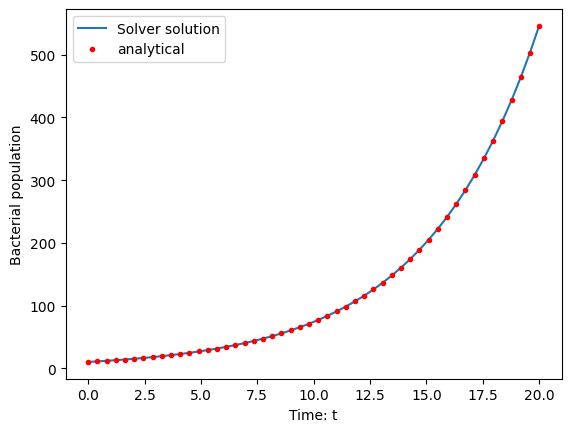

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

# Differential equation for bacterial growth
def dXdt(X, t):
    dXdt = mu * X
    return dXdt

# Parameters and simulation with solver
mu = 0.2                                  # specific growth rate [1/hour]
X0 = 10                                  # initial population (arbitrary units, e.g. mg/L)
t = np.linspace(0, 20,  50)              # time
x = integrate.odeint(dXdt, X0, t)

# Calculate the analytical solution (just to compare)
x_exact = X0 * np.exp(mu*t)

# Plot the growth of the bacteria
plt.plot(t,x, label = 'Solver solution')
plt.plot(t, x_exact, 'r.', label='analytical')
plt.legend()
plt.legend(loc='best')
plt.xlabel('Time: t')
plt.ylabel('Bacterial population')
plt.show()

# LV Predator–Prey (Bacteria–Phage)
Build and explore the Lotka–Volterra predator–prey model, mapped to *E. coli* (prey) and a lytic phage (predator).

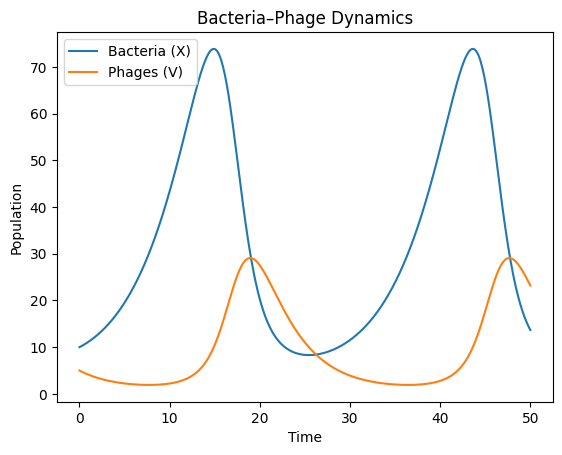

In [2]:
# Differential equations for bacteria (X) and phages (P)
def rhs(XP, t):                         # rhs = right hand side of the equations
    X, P = XP
    dXdt = alpha*X - beta*X*P           # bacterial growth - infection
    dPdt = delta*X*P - gamma*P          # phage growth - decay
    return [dXdt, dPdt]

# Parameters
alpha = 0.2   # bacterial growth rate
beta = 0.02   # infection rate
delta = 0.01  # phage production rate
gamma = 0.3   # phage decay rate

# Initial conditions
X0 = 10.0     # initial bacteria
P0 = 5.0      # initial phages
init = [X0, P0]

# Time grid
t = np.linspace(0, 50, 500)

# Solve ODE system
sol = integrate.odeint(rhs, init, t)
X, P = sol.T

# Plot results
plt.plot(t, X, label='Bacteria (X)')
plt.plot(t, P, label='Phages (V)')
plt.legend(loc='best')
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Bacteria–Phage Dynamics')
plt.show()

# Steady states, initial conditions and parameters

Explore the effect that changing the initial conditions have on the model. Start by identifying if there is a steady state. 

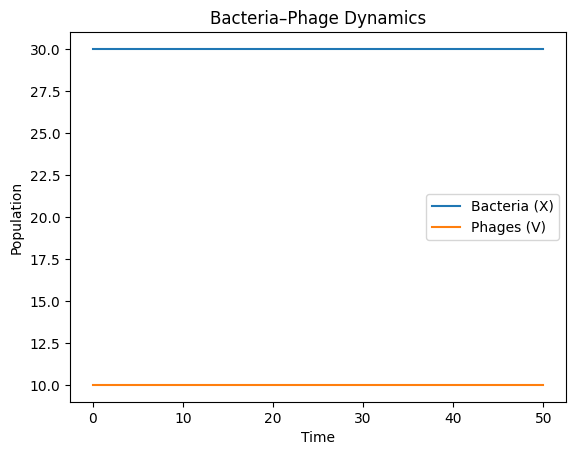

In [3]:
# New initial conditions
X0 = gamma/delta     # initial bacteria
P0 = alpha/beta      # initial phages
init = [X0, P0]

# Time grid
t = np.linspace(0, 50, 500)

# Solve ODE system
sol = integrate.odeint(rhs, init, t)
X, P = sol.T

# Plot results
plt.plot(t, X, label='Bacteria (X)')
plt.plot(t, P, label='Phages (V)')
plt.legend(loc='best')
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Bacteria–Phage Dynamics')
plt.show()

# Show visually cycles between Bacteria and Phage

By changing the initial conditions, let's follow the cycle of bacteria and phages

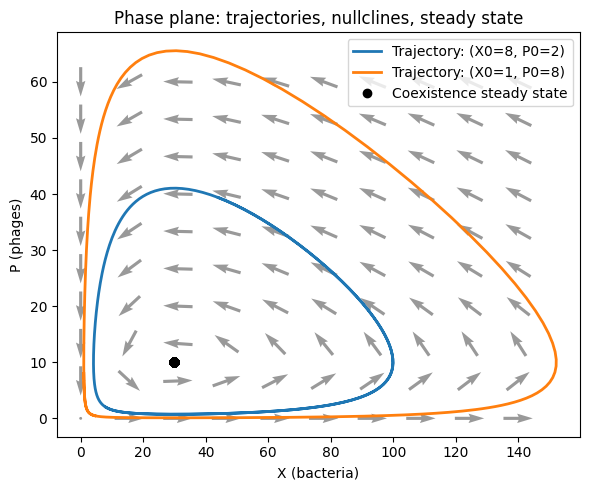

In [4]:

def solve_lv(X0, P0, t_end=50, n_steps=500):
    """Integrate LV ODE from initial conditions (X0, P0)."""
    t = np.linspace(0, t_end, n_steps)
    sol = integrate.odeint(rhs, [X0, P0], t)
    X, P = sol.T
    return t, X, P

# Trajectories from two different initial conditions
t1, X1, P1 = solve_lv(8, 2)   # bacteria high, phage low
t2, X2, P2 = solve_lv(1, 8)   # bacteria low, phage high

# Steady state conditions
t_star, X_star, P_star =  solve_lv(gamma/delta , alpha/beta)


# Creating a grid for the direction field (quiver)
x = np.linspace(0, 140, 10)
y = np.linspace(0, 60, 10)
X, Y = np.meshgrid(x, y)
# Vector field from LV equations
dX = alpha*X - beta*X*Y
dY = delta*X*Y - gamma*Y

# Normalize to unit vectors
M = np.hypot(dX, dY)
u = np.divide(dX, M, out=np.zeros_like(dX), where=M>0)
v = np.divide(dY, M, out=np.zeros_like(dY), where=M>0)

# Plot Bacteria vs Phages for the 3 conditions, and the trajectories
plt.figure(figsize=(6,5))
plt.plot(X1, P1, lw=2, label='Trajectory: (X0=8, P0=2)')
plt.plot(X2, P2, lw=2, label='Trajectory: (X0=1, P0=8)')
# Steady state point
plt.plot(X_star, P_star, 'ko', label='Coexistence steady state')
plt.xlabel('X (bacteria)')
plt.ylabel('P (phages)')
plt.title('Phase plane: trajectories, nullclines, steady state')
plt.legend(loc='best')
plt.tight_layout()
# Plot vector field
plt.quiver(X, Y, u, v, pivot='mid', alpha=0.4)
plt.show()

## Exercise A
- Vary parameters (α, β, γ, δ); find coexistence and extinction regimes.
- Explore sensitivity to initial conditions.
- Bonus: add self-limitation (logistic prey) or a type-II functional response.